In [1]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((348978, 51), (523466, 50))

In [5]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_33,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42
0,id_1,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,...,0,0,0,0,0,0,0,0,0,0
1,id_6,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
2,id_9,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,...,0,0,0,0,0,0,0,0,0,0
3,id_14,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_15,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0


In [7]:
traintest = pd.concat([train, test], axis = 0)

In [8]:
traintest.shape

(872444, 51)

In [9]:
feats_counts = train.nunique(dropna = False)

In [12]:
feats_counts.sort_values()[:10]

cat_var_42    1
cat_var_40    1
cat_var_38    1
cat_var_37    1
cat_var_36    1
cat_var_35    1
cat_var_31    1
cat_var_20    2
cat_var_21    2
cat_var_22    2
dtype: int64

In [13]:
constant_features = feats_counts.loc[feats_counts==1].index.tolist()
print (constant_features)

['cat_var_31', 'cat_var_35', 'cat_var_36', 'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_42']


In [14]:
traintest.drop(constant_features,axis = 1,inplace=True)

In [16]:
train.fillna('NaN', inplace=True)

In [17]:
test.fillna('NaN', inplace=True)

In [18]:
traintest.head()

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,NaN,db,iq,ep,ip,db,ep,tn,tn,ep,...,tn,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0.0,id_11
1,da,qt,iq,iq,hm,db,tn,tn,tn,tn,...,hr,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,0.0,id_33
2,gf,mm,ce,tn,hr,db,ep,tn,tn,ep,...,hr,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,0.0,id_51
3,NaN,es,iq,ep,ce,tn,ep,tn,tn,ep,...,ep,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0.0,id_54
4,da,xy,hr,iq,hm,db,tn,tn,tn,tn,...,ep,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,0.0,id_62


In [12]:
train_enc =  pd.DataFrame(index = train.index)

for col in traintest.columns:
    train_enc[col] = train[col].factorize()[0]

In [13]:
dup_cols = {}

for i, c1 in enumerate(train_enc.columns):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1

In [14]:
dup_cols.keys()

['cat_var_20']

In [15]:
traintest.drop(dup_cols.keys(), axis = 1,inplace=True)

In [16]:
nunique = traintest.nunique(dropna=False)
nunique

cat_var_1            538
cat_var_10            23
cat_var_11             5
cat_var_12             5
cat_var_13            52
cat_var_14            12
cat_var_15             2
cat_var_16             2
cat_var_17             2
cat_var_18             2
cat_var_19             2
cat_var_2             63
cat_var_21             2
cat_var_22             2
cat_var_23             2
cat_var_24             2
cat_var_25             2
cat_var_26             2
cat_var_27             2
cat_var_28             2
cat_var_29             2
cat_var_3            621
cat_var_30             2
cat_var_32             2
cat_var_33             2
cat_var_34             2
cat_var_39             2
cat_var_4              2
cat_var_41             2
cat_var_5              2
cat_var_6            519
cat_var_7             23
cat_var_8            466
cat_var_9              5
num_var_1          17296
num_var_2           6050
num_var_3             14
num_var_4           1111
num_var_5           6206
num_var_6          15527


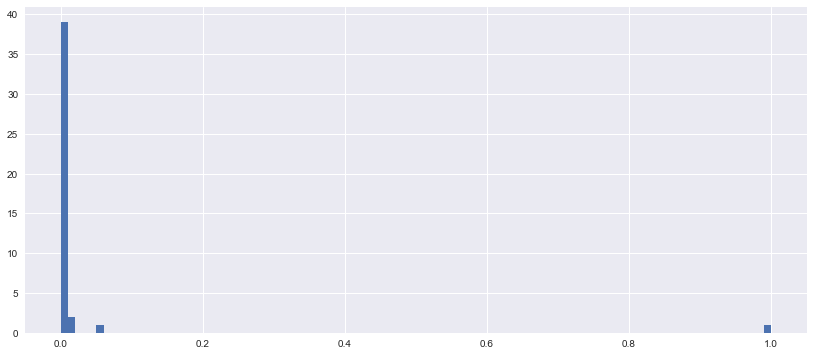

In [33]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/traintest.shape[0], bins=100)

In [40]:
mask = (nunique.astype(float)/traintest.shape[0] > 0.05)
traintest.loc[:, mask]

,num_var_7,transaction_id
0,1.115205e-08,id_11
1,2.433058e-06,id_33
2,4.276014e-07,id_51
3,1.848054e-08,id_54
4,2.152983e-06,id_62
5,9.463310e-08,id_67
6,8.411831e-08,id_71
7,2.453451e-08,id_88
8,1.274520e-08,id_95
9,3.138505e-07,id_97


In [38]:
traintest.shape

(872444, 43)

In [17]:
train.drop(constant_features,axis = 1,inplace=True)
test.drop(constant_features,axis = 1,inplace=True)

In [18]:
train.drop(dup_cols.keys(), axis = 1,inplace=True)
test.drop(dup_cols.keys(), axis = 1,inplace=True)

In [19]:
train.shape , test.shape

((348978, 43), (523466, 42))

In [45]:
nunique = train.nunique(dropna=False)
nunique

transaction_id    348978
num_var_1          13385
num_var_2           5550
num_var_3              8
num_var_4           1006
num_var_5           4622
num_var_6          11827
num_var_7          26213
cat_var_1            535
cat_var_2             60
cat_var_3            617
cat_var_4              2
cat_var_5              2
cat_var_6            518
cat_var_7             20
cat_var_8            463
cat_var_9              5
cat_var_10            23
cat_var_11             5
cat_var_12             5
cat_var_13            52
cat_var_14            12
cat_var_15             2
cat_var_16             2
cat_var_17             2
cat_var_18             2
cat_var_19             2
cat_var_21             2
cat_var_22             2
cat_var_23             2
cat_var_24             2
cat_var_25             2
cat_var_26             2
cat_var_27             2
cat_var_28             2
cat_var_29             2
cat_var_30             2
cat_var_32             2
cat_var_33             2
cat_var_34             2


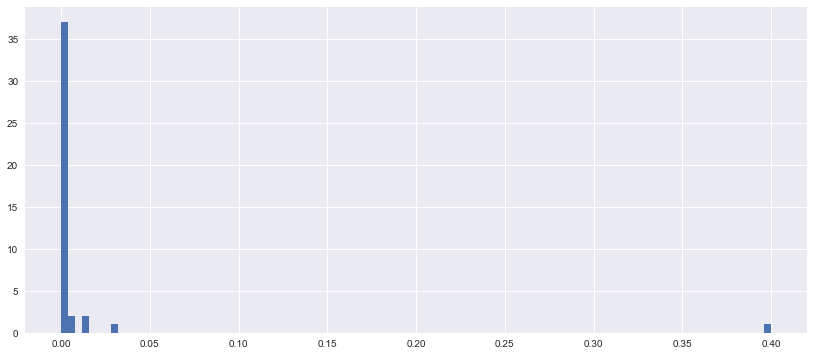

In [46]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/traintest.shape[0], bins=100)

In [47]:
mask = (nunique.astype(float)/traintest.shape[0] > 0.01)
traintest.loc[:, mask]

,num_var_1,num_var_6,num_var_7,transaction_id
0,2.302632e-08,2.368421e-08,1.115205e-08,id_11
1,7.965789e-06,7.965789e-06,2.433058e-06,id_33
2,7.828947e-08,1.052632e-07,4.276014e-07,id_51
3,7.894737e-08,2.190789e-07,1.848054e-08,id_54
4,3.321053e-06,3.340789e-06,2.152983e-06,id_62
5,1.953947e-07,4.407895e-08,9.463310e-08,id_67
6,1.736842e-07,1.736842e-07,8.411831e-08,id_71
7,5.789474e-08,5.789474e-08,2.453451e-08,id_88
8,3.289474e-08,9.868421e-08,1.274520e-08,id_95
9,5.500000e-07,5.500000e-07,3.138505e-07,id_97


In [20]:
cat_cols = list(train.select_dtypes(include=['object']).columns)
num_cols = list(train.select_dtypes(exclude=['object']).columns)

In [21]:
def autolabel(arrayA):
    ''' label each colored square with the corresponding data value. 
    If value > 20, the text is in black, else in white.
    '''
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
                plt.text(j,i, "%.2f"%arrayA[i,j], ha='center', va='bottom',color='w')

def hist_it(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.8)
    feat[Y==1].hist(bins=range(int(feat.min()),int(feat.max()+2)),normed=True,alpha=0.5)
    plt.ylim((0,1))
    
def gt_matrix(feats,sz=16):
    a = []
    for i,c1 in enumerate(feats):
        b = [] 
        for j,c2 in enumerate(feats):
            mask = (~train[c1].isnull()) & (~train[c2].isnull())
            if i>=j:
                b.append((train.loc[mask,c1].values>=train.loc[mask,c2].values).mean())
            else:
                b.append((train.loc[mask,c1].values>train.loc[mask,c2].values).mean())

        a.append(b)

    plt.figure(figsize = (sz,sz))
    plt.imshow(a, interpolation = 'None')
    _ = plt.xticks(range(len(feats)),feats,rotation = 90)
    _ = plt.yticks(range(len(feats)),feats,rotation = 0)
    autolabel(a)

In [22]:
def hist_it1(feat):
    plt.figure(figsize=(16,4))
    feat[Y==0].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    feat[Y==1].hist(bins=100,range=(feat.min(),feat.max()),normed=True,alpha=0.5)
    plt.ylim((0,1))

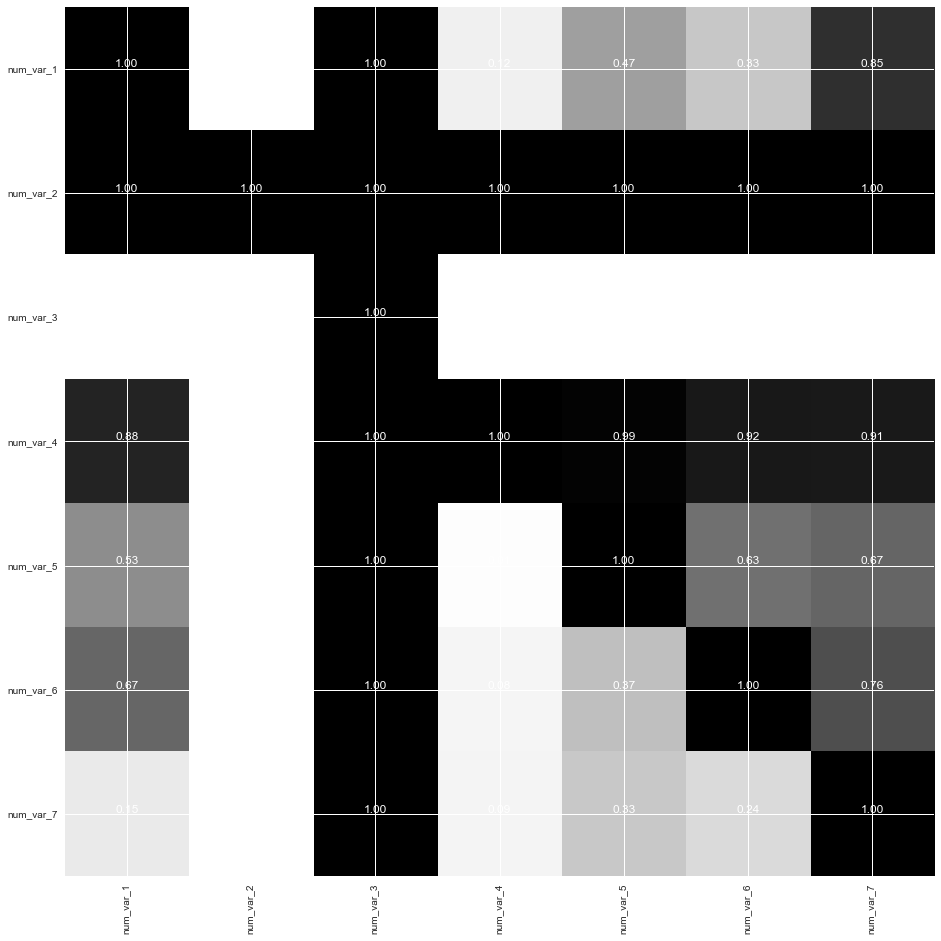

In [57]:
# select first 42 numeric features
feats = num_cols[:42]

# build 'mean(feat1 > feat2)' plot
gt_matrix(feats,16)

In [59]:
Y = train.target

(0, 1)

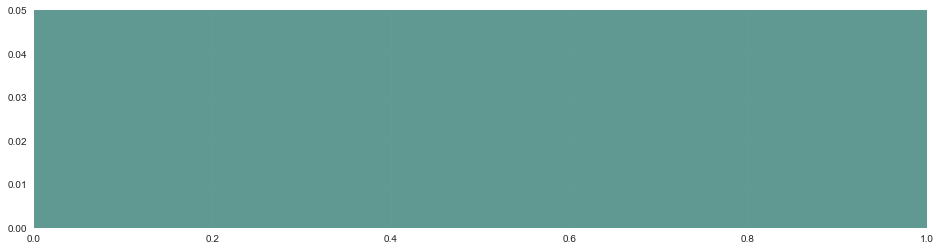

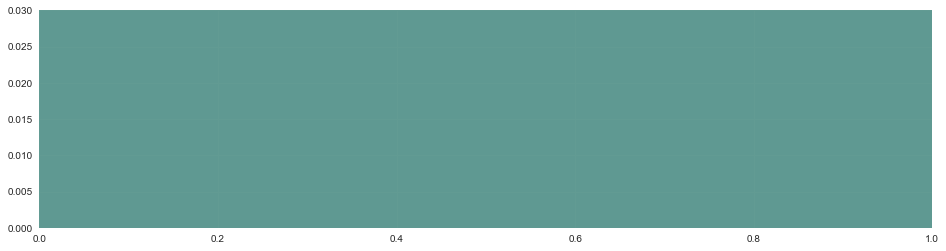

In [64]:
hist_it(train['num_var_1'])
plt.ylim((0,0.05))
plt.xlim((0,1))

hist_it(train['num_var_2'])
plt.ylim((0,0.03))
plt.xlim((0,1))

In [62]:
train['num_var_1'].value_counts()

1.315789e-08    4208
6.578947e-09    3804
6.578947e-08    3417
2.631579e-08    3047
1.644737e-08    3037
3.256579e-07    2902
1.973684e-08    2661
3.289474e-08    2594
4.605263e-09    2333
5.921053e-09    2317
1.250000e-08    2270
3.947368e-09    2104
2.171053e-08    1983
8.421053e-08    1973
3.947368e-08    1857
2.302632e-08    1829
3.289474e-09    1808
1.315789e-07    1776
9.868421e-09    1688
9.868421e-08    1674
1.302632e-07    1672
2.500000e-08    1573
2.631579e-09    1569
3.289474e-07    1540
7.894737e-09    1530
4.605263e-08    1504
1.578947e-08    1434
9.210526e-09    1431
7.236842e-09    1394
5.263158e-09    1389
                ... 
4.500000e-06       1
1.123224e-05       1
2.819434e-04       1
1.097961e-05       1
5.194079e-06       1
5.772368e-06       1
3.327632e-06       1
1.224408e-05       1
6.628289e-06       1
1.050461e-05       1
5.201974e-06       1
2.413816e-06       1
2.046579e-05       1
4.419737e-06       1
7.522895e-05       1
1.086250e-05       1
7.413158e-06 

In [65]:
x8_unique = train['num_var_1'].unique()
x8_unique_sorted = np.sort(x8_unique)
                           
np.diff(x8_unique_sorted)

array([  6.57894737e-10,   6.57894737e-10,   6.57894737e-10, ...,
         2.01066778e-01,   2.30263158e-02,   2.13815789e-01])

In [71]:
np.diff(x8_unique_sorted)[:1000]

array([  6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,   6.57894737e-10,   6.57894737e-10,
         6.57894737e-10,

In [72]:
np.diff(x8_unique_sorted/6.57894737e-10)[:50]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [74]:
(train['num_var_1']/6.57894737e-10).head(10)

0       35.000000
1    12107.999997
2      119.000000
3      120.000000
4     5047.999999
5      297.000000
6      264.000000
7       88.000000
8       50.000000
9      836.000000
Name: num_var_1, dtype: float64

In [75]:
x8_int = (train['num_var_1']/6.57894737e-10).round()
x8_int.head(10)

0       35.0
1    12108.0
2      119.0
3      120.0
4     5048.0
5      297.0
6      264.0
7       88.0
8       50.0
9      836.0
Name: num_var_1, dtype: float64

In [76]:
x8_int.value_counts()

20.0        4208
10.0        3804
100.0       3417
40.0        3047
25.0        3037
495.0       2902
30.0        2661
50.0        2594
7.0         2333
9.0         2317
19.0        2270
6.0         2104
33.0        1983
128.0       1973
60.0        1857
35.0        1829
5.0         1808
200.0       1776
15.0        1688
150.0       1674
198.0       1672
38.0        1573
4.0         1569
500.0       1540
12.0        1530
70.0        1504
24.0        1434
14.0        1431
11.0        1394
8.0         1389
            ... 
10507.0        1
25649.0        1
14990.0        1
21017.0        1
8086.0         1
10511.0        1
4421.0         1
14450.0        1
59948.0        1
20998.0        1
10498.0        1
20995.0        1
9156.0         1
20957.0        1
23464.0        1
30018.0        1
8490.0         1
20962.0        1
16200.0        1
5241.0         1
12116.0        1
119957.0       1
6840.0         1
15005.0        1
4420.0         1
12827.0        1
20983.0        1
83933.0       

In [102]:
train.isnull().sum()

AttributeError: 'str' object has no attribute 'isnull'

In [89]:
train['cat_var_1'].value_counts(dropna=False)

gf     132170
da     100964
pu      20069
NaN     15782
ye       6303
ex       3236
on       3121
ln       2915
og       2206
to       2089
nk       2025
tl       1863
qk       1641
yv       1182
zl       1180
pv       1164
xf       1132
nm        947
tq        881
ap        859
pt        845
jp        815
by        809
fx        756
hn        726
mx        700
nj        643
ua        618
qt        601
ka        558
        ...  
vx         10
pe         10
bo         10
hg         10
ha         10
eh         10
in          9
dj          9
rv          9
ms          9
bc          9
sx          9
qa          9
kh          9
tt          9
oh          8
rc          8
mh          7
ea          7
at          7
xn          6
py          6
cc          5
ed          5
tr          5
ev          4
zu          4
zp          4
hk          3
or          2
Name: cat_var_1, Length: 535, dtype: int64

In [83]:
train.dtypes

transaction_id     object
num_var_1         float64
num_var_2         float64
num_var_3         float64
num_var_4         float64
num_var_5         float64
num_var_6         float64
num_var_7         float64
cat_var_1          object
cat_var_2          object
cat_var_3          object
cat_var_4          object
cat_var_5          object
cat_var_6          object
cat_var_7          object
cat_var_8          object
cat_var_9          object
cat_var_10         object
cat_var_11         object
cat_var_12         object
cat_var_13         object
cat_var_14         object
cat_var_15         object
cat_var_16         object
cat_var_17         object
cat_var_18         object
cat_var_19          int64
cat_var_21          int64
cat_var_22          int64
cat_var_23          int64
cat_var_24          int64
cat_var_25          int64
cat_var_26          int64
cat_var_27          int64
cat_var_28          int64
cat_var_29          int64
cat_var_30          int64
cat_var_32          int64
cat_var_33  

In [23]:
train.loc[:,cat_cols].head().T

,0,1,2,3,4
transaction_id,id_11,id_33,id_51,id_54,id_62
cat_var_1,NaN,da,gf,NaN,da
cat_var_2,ce,tn,ce,ce,tn
cat_var_3,db,zl,gs,fy,zn
cat_var_4,ep,tn,tn,ep,tn
cat_var_5,tn,ep,ep,ep,ep
cat_var_6,mm,hm,zs,qw,hm
cat_var_7,ep,ep,ep,ep,ep
cat_var_8,NaN,NaN,dn,tk,NaN
cat_var_9,tn,hr,hr,ep,ep


In [24]:
l1=[]
l3=[]
l8=[]
for index,row in train.iterrows():
    if (row['cat_var_1']=='NaN'):
        l1.append(1)
    else:
        l1.append(0)
        
    if row['cat_var_3']=='NaN':
        l3.append(1)
    else:
        l3.append(0)
        
    if row['cat_var_8']=='NaN':
        l8.append(1)
    else:
        l8.append(0)

In [25]:
from collections import Counter

In [26]:
Counter(l1)

Counter({0: 333196, 1: 15782})

In [27]:
train['cat_1_is_null'] = l1
train['cat_3_is_null'] = l3
train['cat_8_is_null'] = l8

In [36]:
l1=[]
l3=[]
l8=[]
for index,row in test.iterrows():
    if (row['cat_var_1']=='NaN'):
        l1.append(1)
    else:
        l1.append(0)
        
    if row['cat_var_3']=='NaN':
        l3.append(1)
    else:
        l3.append(0)
        
    if row['cat_var_8']=='NaN':
        l8.append(1)
    else:
        l8.append(0)

In [37]:
test['cat_1_is_null'] = l1
test['cat_3_is_null'] = l3
test['cat_8_is_null'] = l8

In [137]:
trainu = train['cat_var_6'].unique()

In [134]:
testu = test['cat_var_6'].unique()

In [135]:
for i in trainu:
    if i in testu:
        continue
    print i

qw
ln
qt


In [136]:
for i in testu:
    if i in trainu:
        continue
    print i

NaN


In [139]:
train['cat_var_6'].value_counts()[:10]

zs    132059
hm    100850
qt      6291
mm      5805
qw      4955
da      4563
ta      3602
ua      3534
ln      3247
no      2893
Name: cat_var_6, dtype: int64

In [151]:
test['cat_var_6'].value_counts()[:5]

zs     198423
hm     151913
NaN     21943
mm       8393
da       6812
Name: cat_var_6, dtype: int64

In [150]:
(train.loc[train['cat_var_8']=='NaN','cat_var_6']).value_counts()

hm    100850
da      2130
ua      1282
ln       873
ta       657
mm       472
no       372
iq       350
mp       288
au       233
op       182
is       164
uz       161
jt       112
td       111
qz        84
hn        82
vp        81
tf        80
ic        75
jv        62
og        51
pg        51
ac        48
en        46
ot        42
qb        41
tr        40
dn        37
re        35
       ...  
lt         2
yz         2
hr         2
yv         2
fn         2
ps         2
hs         2
rk         2
hq         2
yx         2
pu         2
ry         2
po         2
vn         1
ho         1
ff         1
il         1
bk         1
qh         1
so         1
ep         1
lp         1
af         1
nx         1
zn         1
ye         1
ui         1
pj         1
nm         1
hl         1
Name: cat_var_6, Length: 115, dtype: int64

In [141]:
train[cat_cols]

,transaction_id,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18
0,id_11,NaN,ce,db,ep,tn,mm,ep,NaN,tn,db,iq,ep,ip,db,ep,tn,tn,ep
1,id_33,da,tn,zl,tn,ep,hm,ep,NaN,hr,qt,iq,iq,hm,db,tn,tn,tn,tn
2,id_51,gf,ce,gs,tn,ep,zs,ep,dn,hr,mm,ce,tn,hr,db,ep,tn,tn,ep
3,id_54,NaN,ce,fy,ep,ep,qw,ep,tk,ep,es,iq,ep,ce,tn,ep,tn,tn,ep
4,id_62,da,tn,zn,tn,ep,hm,ep,NaN,ep,xy,hr,iq,hm,db,tn,tn,tn,tn
5,id_67,gf,ce,qt,tn,tn,zs,ep,dn,tn,td,tn,tn,hr,db,ep,tn,tn,ep
6,id_71,hn,ce,qt,ep,ep,ts,ep,hn,ce,td,tn,tn,db,td,ep,tn,ep,tn
7,id_88,da,tn,xp,tn,ep,hm,ep,NaN,iq,ip,tn,iq,hm,db,tn,tn,ep,tn
8,id_95,pu,ce,NaN,ep,tn,jt,ep,jo,tn,rv,iq,ce,es,ep,ep,ep,tn,tn
9,id_97,da,tn,tl,tn,ep,hm,ep,NaN,tn,qt,hr,iq,hm,db,tn,tn,ep,tn


In [152]:
(train.loc[train['cat_var_6']=='qw',cat_cols])

,transaction_id,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18
3,id_54,NaN,ce,fy,ep,ep,qw,ep,tk,ep,es,iq,ep,ce,tn,ep,tn,tn,ep
37,id_322,NaN,ce,hm,ep,ep,qw,ep,tk,hr,ep,ep,ep,ce,tn,ep,tn,tn,ep
69,id_512,NaN,ce,NaN,ep,ep,qw,ep,tk,tn,db,iq,ep,ce,tn,ep,tn,tn,ep
83,id_621,NaN,ce,qh,ep,ep,qw,ep,tk,ep,es,iq,ep,ce,tn,ep,tn,tn,ep
149,id_996,NaN,ce,db,ep,ep,qw,ep,tk,iq,ep,ep,ep,ce,tn,ep,tn,tn,ep
157,id_1038,NaN,ce,hv,ep,ep,qw,ep,tk,tn,mp,ce,ep,ce,tn,ep,tn,tn,ep
187,id_1170,NaN,ce,NaN,ep,ep,qw,ep,tk,ep,es,iq,ep,ce,tn,ep,tn,tn,ep
229,id_1393,NaN,ce,fm,ep,ep,qw,ep,tk,ep,ye,hr,ep,ce,tn,ep,tn,tn,ep
289,id_1799,NaN,ce,db,ep,ep,qw,ep,tk,tn,ua,ce,ep,ce,tn,ep,tn,tn,ep
352,id_2215,NaN,ce,db,ep,ep,qw,ep,tk,ep,ex,tn,ep,ce,tn,ep,tn,tn,ep


In [154]:
(train.loc[train['cat_var_6']=='qw','cat_var_1']).value_counts()

NaN    4955
Name: cat_var_1, dtype: int64

In [155]:
(train.loc[train['cat_var_6']=='qw','cat_var_2']).value_counts()

ce    4955
Name: cat_var_2, dtype: int64

In [162]:
train[train['cat_var_2']=='ce'].loc[train['cat_var_1']=='NaN', 'cat_var_6'].value_counts()

qw    4955
da    2108
nj    2031
ua    1275
ln     868
ta     657
mm     462
no     369
iq     343
mp     282
au     228
is     161
uz     159
td     114
jt     114
my      93
qz      83
hn      81
tf      80
ic      73
uh      70
jv      61
pg      51
og      50
ah      46
ac      44
en      43
qb      40
tr      40
ot      39
      ... 
sx       3
ok       3
oi       3
bl       3
kc       3
vf       3
fn       2
ry       2
uf       2
hs       2
ui       2
ps       2
yv       2
pu       2
rk       2
po       2
ei       2
hq       2
gq       2
yx       2
nm       1
il       1
pj       1
nx       1
hl       1
ep       1
sv       1
ho       1
ye       1
lt       1
Name: cat_var_6, Length: 113, dtype: int64

In [163]:
train['cat_var_4'].value_counts()

tn    232909
ep    116069
Name: cat_var_4, dtype: int64

In [164]:
train[train['cat_var_2']=='ce'][train['cat_var_4']=='ep'].loc[train['cat_var_1']=='NaN', 'cat_var_6'].value_counts()

qw    4955
da    2108
nj    2031
ua    1275
ln     868
ta     657
mm     462
no     369
iq     343
mp     282
au     228
is     161
uz     159
td     114
jt     114
my      93
qz      83
hn      81
tf      80
ic      73
uh      70
jv      61
pg      51
og      50
ah      46
ac      44
en      43
qb      40
tr      40
ot      39
      ... 
sx       3
ok       3
oi       3
bl       3
kc       3
vf       3
fn       2
ry       2
uf       2
hs       2
ui       2
ps       2
yv       2
pu       2
rk       2
po       2
ei       2
hq       2
gq       2
yx       2
nm       1
il       1
pj       1
nx       1
hl       1
ep       1
sv       1
ho       1
ye       1
lt       1
Name: cat_var_6, Length: 113, dtype: int64

In [170]:
(train.loc[train['cat_var_6']=='qt',cat_cols])

,transaction_id,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18
39,id_328,ye,ji,gk,ep,ep,qt,ep,ye,ep,ji,tn,hr,qt,td,tn,tn,ep,tn
58,id_431,ye,ji,me,ep,ep,qt,ep,ye,iq,td,tn,hr,qt,td,tn,tn,ep,tn
68,id_509,ye,ji,ba,ep,ep,qt,ep,ye,ep,es,iq,hr,qt,td,tn,tn,ep,tn
99,id_677,ye,ji,vi,ep,ep,qt,ep,ye,iq,ep,ep,hr,qt,td,tn,tn,ep,tn
250,id_1527,ye,ji,hm,ep,ep,qt,ep,ye,iq,hm,iq,hr,qt,td,tn,tn,ep,tn
304,id_1886,ye,ji,bj,ep,ep,qt,ep,ye,ep,qt,iq,hr,qt,td,tn,tn,ep,tn
344,id_2143,ye,ji,nk,ep,ep,qt,ep,ye,ce,mp,ce,hr,qt,td,tn,tn,ep,tn
363,id_2303,ye,ji,mx,ep,ep,qt,ep,ye,hr,rv,iq,hr,qt,td,tn,tn,ep,tn
451,id_2899,ye,ji,yv,ep,ep,qt,ep,ye,hr,ye,hr,hr,qt,td,tn,tn,ep,tn
468,id_3001,ye,ji,hn,ep,ep,qt,ep,ye,ep,hm,iq,hr,qt,td,tn,tn,ep,tn


In [167]:
(train.loc[train['cat_var_6']=='qt','cat_var_2']).value_counts()

ji    6291
Name: cat_var_2, dtype: int64

In [181]:
test[test['cat_var_8']=='ye'].loc[test['cat_var_6']=='NaN','cat_var_6'] ='qt'

In [28]:
l6=[]
for index,row in test.iterrows():
    if row['cat_var_8']=='ye':
        if row['cat_var_6']=='NaN':
            l6.append('qt')
        else:
            l6.append(row['cat_var_6'])
    else:
        l6.append(row['cat_var_6'])

In [179]:
test.loc[test['cat_var_6']=='NaN',cat_cols]

,transaction_id,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18
35,id_105,NaN,ji,hn,ep,ep,NaN,ep,ye,iq,td,tn,hr,qt,td,tn,tn,ep,tn
36,id_108,gz,ce,ye,ep,ep,NaN,ep,tk,ce,ye,hr,ep,ce,tn,ep,tn,tn,ep
83,id_338,gz,ce,qt,ep,ep,NaN,ep,tk,ep,es,iq,ep,ce,tn,ep,tn,tn,ep
108,id_468,gz,ce,ye,ep,tn,NaN,ep,tk,tn,yv,hr,ep,ce,tn,ep,tn,tn,ep
144,id_632,NaN,ji,mm,ep,ep,NaN,ep,ye,ep,hr,ep,hr,qt,td,tn,tn,ep,tn
149,id_649,NaN,ji,ba,ep,ep,NaN,ep,ye,iq,td,tn,hr,qt,td,tn,tn,ep,tn
151,id_655,gz,ce,NaN,ep,ep,NaN,ep,tk,tn,hr,ep,ep,ce,tn,ep,tn,tn,ep
157,id_691,NaN,ji,ua,ep,ep,NaN,ep,ye,ep,ip,tn,hr,qt,td,tn,tn,ep,tn
160,id_702,NaN,ji,es,ep,ep,NaN,ep,ye,iq,ye,hr,hr,qt,td,tn,tn,ep,tn
162,id_706,NaN,ji,kn,ep,ep,NaN,ep,ye,ep,es,iq,hr,qt,td,tn,tn,ep,tn


In [191]:
test['cat_var_6'].value_counts()

zs     198423
hm     151913
NaN     12451
qt       9492
mm       8393
da       6812
ta       5329
ua       5218
no       4237
db       3933
iq       3175
xm       3134
nj       3133
bx       3011
mp       2641
uz       2521
sr       2426
au       2178
kh       2102
jx       1999
mx       1903
ct       1784
qm       1771
is       1720
td       1470
jt       1465
kg       1335
io       1250
tf       1242
xy       1219
        ...  
mv         26
mh         24
ls         24
gk         24
ay         23
ad         23
jp         23
yy         22
sc         22
fb         21
fw         21
hf         21
zm         20
lv         20
fk         20
rw         19
zl         19
rc         19
cw         19
rm         19
vw         18
xh         18
ii         18
pa         18
wa         17
qa         17
wb         16
ke         16
zo         15
nw         12
Name: cat_var_6, Length: 517, dtype: int64

In [29]:
len(l6) , len(test)

(523466, 523466)

In [30]:
test['cat_var_6'] = l6

In [192]:
(train.loc[train['cat_var_6']=='ln',cat_cols])

,transaction_id,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18
20,id_218,pu,ce,hm,ep,tn,ln,ep,jo,iq,ep,ep,ce,es,ep,ep,ep,tn,tn
74,id_549,pu,ce,NaN,ep,tn,ln,ep,jo,ce,ji,tn,ce,es,ep,ep,ep,tn,tn
125,id_849,NaN,ce,NaN,ep,tn,ln,ep,NaN,iq,cg,ce,ep,ip,db,ep,tn,tn,ep
182,id_1134,pu,ce,hm,ep,tn,ln,ep,jo,ep,es,iq,ce,es,ep,ep,ep,tn,tn
312,id_1923,NaN,ce,hm,ep,tn,ln,ep,NaN,iq,mp,ce,ep,ip,db,ep,tn,tn,ep
551,id_3532,pu,ce,qt,ep,tn,ln,ep,jo,ep,es,iq,ce,es,ep,ep,ep,tn,tn
658,id_4176,pu,ce,hm,ep,tn,ln,ep,jo,tn,xy,hr,ce,es,ep,ep,ep,tn,tn
691,id_4380,NaN,ce,hm,ep,tn,ln,ep,NaN,hr,da,hr,ep,ip,db,ep,tn,tn,ep
943,id_6062,gv,ep,hm,ep,tn,ln,ep,ji,hr,qt,iq,hr,qj,iq,ep,tn,ep,tn
970,id_6261,pu,ce,yv,ep,tn,ln,ep,jo,tn,xy,hr,ce,es,ep,ep,ep,tn,tn


In [194]:
(train.loc[train['cat_var_6']=='ln','cat_var_5']).value_counts()

tn    3029
ep     218
Name: cat_var_5, dtype: int64

In [196]:
(train.loc[train['cat_var_6']=='qw','cat_var_5']).value_counts()

ep    4605
tn     350
Name: cat_var_5, dtype: int64

In [195]:
(train.loc[train['cat_var_5']=='tn','cat_var_6']).value_counts()

zs    102991
hm     10426
mm      5319
da      4234
ta      3342
ua      3271
ln      3029
no      2648
bx      2072
nj      2023
iq      1938
mp      1649
uz      1488
au      1369
is      1022
td       882
db       860
jt       832
tf       702
hn       692
ic       567
sb       566
kh       553
qz       535
mu       494
jv       439
en       421
qc       418
mf       407
kg       404
       ...  
pk         2
kj         2
ih         1
jx         1
dj         1
ke         1
dv         1
fm         1
vw         1
hh         1
bo         1
un         1
fx         1
gr         1
gy         1
tl         1
xx         1
uc         1
ce         1
pa         1
me         1
fo         1
za         1
wx         1
se         1
hz         1
ms         1
hw         1
qp         1
ql         1
Name: cat_var_6, Length: 479, dtype: int64

In [31]:
l6=[]
for index,row in test.iterrows():
    if (row['cat_var_5']=='tn') & (row['cat_var_6']=='NaN'):
        l6.append('ln')
        
    elif (row['cat_var_5']=='ep') & (row['cat_var_6']=='NaN'):
        l6.append('qw')
        
    else:
        l6.append(row['cat_var_6'])

In [202]:
Counter(l6)

Counter({'aa': 108,
         'ab': 76,
         'ac': 500,
         'ad': 23,
         'ae': 32,
         'af': 109,
         'ag': 313,
         'ah': 120,
         'al': 197,
         'am': 30,
         'ao': 367,
         'ap': 667,
         'aq': 631,
         'as': 162,
         'at': 86,
         'au': 2178,
         'av': 144,
         'aw': 56,
         'ax': 61,
         'ay': 23,
         'az': 61,
         'ba': 64,
         'bc': 33,
         'bd': 273,
         'be': 58,
         'bf': 37,
         'bg': 44,
         'bh': 170,
         'bj': 236,
         'bk': 127,
         'bl': 131,
         'bm': 40,
         'bn': 82,
         'bo': 56,
         'bp': 43,
         'br': 36,
         'bs': 111,
         'bt': 41,
         'bx': 3011,
         'by': 278,
         'bz': 119,
         'cb': 188,
         'cc': 42,
         'cd': 48,
         'ce': 255,
         'cf': 88,
         'cg': 979,
         'ch': 115,
         'ci': 67,
         'cj': 46,
         'ck': 449,
   

In [203]:
len(l6)

523466

In [32]:
test['cat_var_6'] = l6

In [33]:
test['cat_var_6'].value_counts()

zs    198423
hm    151913
qt      9492
mm      8393
qw      7428
da      6812
ta      5329
ua      5218
ln      5023
no      4237
db      3933
iq      3175
xm      3134
nj      3133
bx      3011
mp      2641
uz      2521
sr      2426
au      2178
kh      2102
jx      1999
mx      1903
ct      1784
qm      1771
is      1720
td      1470
jt      1465
kg      1335
io      1250
tf      1242
       ...  
mv        26
mh        24
ls        24
gk        24
ay        23
ad        23
jp        23
yy        22
sc        22
fb        21
fw        21
hf        21
zm        20
lv        20
fk        20
rw        19
zl        19
rc        19
cw        19
rm        19
vw        18
xh        18
ii        18
pa        18
wa        17
qa        17
wb        16
ke        16
zo        15
nw        12
Name: cat_var_6, Length: 518, dtype: int64

In [207]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_30,cat_var_32,cat_var_33,cat_var_34,cat_var_39,cat_var_41,target,cat_1_is_null,cat_3_is_null,cat_8_is_null
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,1,0,1
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,1
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,1,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,1


In [38]:
test.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_29,cat_var_30,cat_var_32,cat_var_33,cat_var_34,cat_var_39,cat_var_41,cat_1_is_null,cat_3_is_null,cat_8_is_null
0,id_1,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,...,0,0,0,0,0,0,0,0,0,0
1,id_6,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,...,0,0,0,0,0,0,0,0,1,0
2,id_9,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,...,0,0,0,0,0,0,0,0,0,0
3,id_14,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_15,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,...,0,0,0,0,0,0,0,0,1,0


In [34]:
train.to_csv('train_mod.csv',index=False)

In [39]:
test.to_csv('test_mod.csv',index=False)